{'rect': (0, 0, 6, 13), 'size': 60, 'labels': [0.0]}
268
len==== 12
len==== 7
(164.0, 242.0)
(226.5, 743.5)
(627.5, 565.0)
(649.0, 338.0)
(115.0, 455.0)
(453.5, 630.5)
(383.0, 256.5)


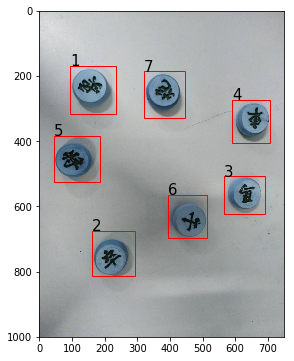

In [4]:
import cv2
import selectivesearch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

image2="IMG_20181221_155746.jpg"
#用cv2读取图片
img = cv2.imread(image2)
#白底黑字图 改为黑底白字图
# img=255-img
#selectivesearch 调用selectivesearch函数 对图片目标进行搜索
img_lbl, regions =selectivesearch.selective_search(
img, scale=500, sigma=0.9, min_size=20)
print (regions[0]) #{'labels': [0.0], 'rect': (0, 0, 585, 301), 'size': 160699} 第一个为原始图的区域
print (len(regions)) #共搜索到199个区域
# 接下来我们把窗口和图像打印出来，对它有个直观认识


candidates = set()
for r in regions:
    # 去除相同的框
    if r['rect'] in candidates:
        continue
    # 去除小框和大框
#     if r['size'] < 10000 or r['size']>20000:
    if r['size'] < 2000 or r['size']>20000:
        continue
    # distorted rects
    x, y, w, h = r['rect']
    if w / h > 1.2 or h / w > 2:
        continue
    candidates.add(r['rect'])
print('len====',len(candidates))


num_array=[]
for i in candidates:
    if len(num_array)==0:
        num_array.append(i)
    else:
        content=False
        replace=-1
        index=0
    for j in num_array:
        ##新窗口在小圈 则滤除
        if i[0]>=j[0] and i[0]+i[2]<=j[0]+j[2] and i[1]>=j[1] and i[1]+i[3]<=j[1]+j[3]:
            content=True
            break
        ##新窗口不在小圈 而在老窗口外部 替换老窗口
        elif i[0]<=j[0] and i[0]+i[2]>=j[0]+j[2] and i[1]<=j[1] and i[1]+i[3]>=j[1]+j[3]:
            replace=index
            break
        index+=1
    if not content:
        if replace>=0:
            num_array[replace]=i
        else:
            num_array.append(i)
#窗口过滤完之后的数量
size=len(num_array)
#二次过滤后剩余10个窗
print ('len====',size)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
n = 1
for x, y, w, h in num_array:
    image_position = (x+w/2,y+h/2)
    print(image_position)
    rect = mpatches.Rectangle(
    (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
    ax.text(x, y, str(n),fontsize=15)
    crop_imgae = img[y:y+h,x:x+w]
    cv2.imwrite('./aaa/'+str(n)+'.jpg',crop_imgae)
    n += 1
plt.show()